In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

In [2]:
# Посчитать tpr и fpr в ноутбуке с лекции. 
# Убедиться, что график ROC AUC получается таким же, как и штатными средствами

In [3]:
# Загружаем данные и строим модель
data = pd.read_csv('affair_data.csv')
X = data[data.columns[:-1]]
y = data['affair']
model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
model.fit(X_train, y_train)
predictions = model.predict_proba(X_test)

In [4]:
# Строим функцию для расчета ROC и Recall-Precision
def get_frp_tpr(predictions, targets, type='ROC'):
    fpr = np.array([])         # False positive rate array
    tpr = np.array([])         # True positive rate array
    precision = np.array([])   # Precision
    recall = np.array([])      # Recall
    precision_func = lambda tp, fp: 0 if (tp + fp) == 0 else (tp / (tp + fp))
    recall_func = lambda tp, fn: 0 if (tp + fn) == 0 else (tp / (tp + fn))
    
    range_array = lambda type: np.arange(0.0, 1.0 + 1/844, 1/844) if type == 'ROC' else np.arange(0.0, 1.0 + 1/1783, 1/1783)
    
    for _ in range_array(type):
        tp = 0    # True positive
        fp = 0    # False positive
        fn = 0    # False negative
        tn = 0    # True negative
        for predicted_prob, actual in zip( predictions[:, 1], targets ):    
            if predicted_prob >= _:
                predicted = 1
            else:
                predicted = 0
            if predicted == 1:
                if actual == 1:
                    tp += 1
                else:
                    fp += 1
            else:
                if actual == 1:
                    fn += 1
                else:
                    tn += 1
                    
        if type == 'ROC':
            fpr = np.append(fpr, (fp / (fp + tn)))
            tpr = np.append(tpr, (tp / (tp + fn)))
        elif type == 'PRECISION_RECALL':
            presicion_result = precision_func(tp, fp)
            recall_result = recall_func(tp, fn)
            precision = np.append(precision, precision_func(tp, fp)) if presicion_result > 0 else precision
            recall = np.append(recall, recall_func(tp, fn)) if recall_result > 0 else recall
        else:
            print('Укажите пожалуйста тип расчета')
            break
            
    if type == 'ROC':    
        return fpr, tpr
    else:
        return precision, recall

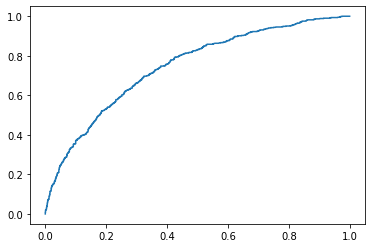

In [5]:
# Строим ROC с помощью библиотеки
fpr, tpr, thres = roc_curve( y_test, predictions[:, 1] )
plt.plot( fpr, tpr )

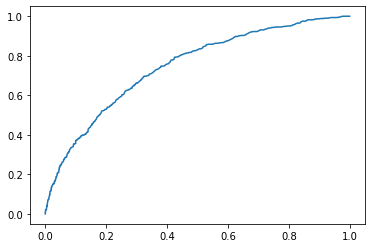

In [6]:
# Строим ROC "вручную"
fpr_manual, tpr_manual = get_frp_tpr(predictions, y_test, type='ROC')
plt.plot( fpr_manual, tpr_manual )

In [7]:
# Поcтроить график Precision - Recall на этих же данных

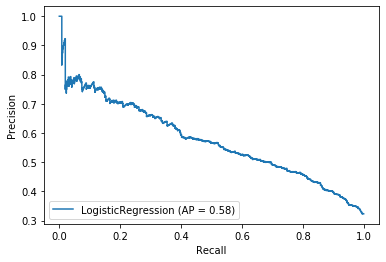

In [8]:
# Строим Precision - Recall с помощью библиотеки
plot_precision_recall_curve(model, X_test, y_test)

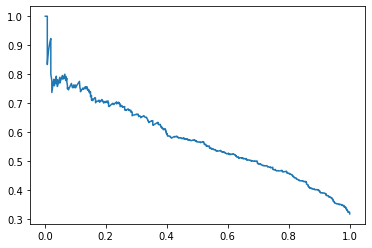

In [9]:
# Строим Precision - Recall "вручную"
precision_manual, recall_manual = get_frp_tpr(predictions, y_test, type='PRECISION_RECALL') 
plt.plot( recall_manual, precision_manual )